# Introduction to Newton Raphson

The Newton-Raphson method, also known as the Newton method, is an iterative numerical technique used to find approximate roots to a real-valued function $f(x)$. 

The method starts with an initial guess for the root of the function, denoted as $x_0$. The iterative formula for finding better approximations to the root is as follows:

\begin{equation} x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}\end{equation}

Where:
- $x_{n+1}$ is the next approximation of the root.
- $x_{n}$ is the current approximation of the root.
- $f(x_{n})$ is the value of the function at the current approximation.
- $f'(x_{n})$ is the derivative of the function with respect to x at the current approximation.

The process is repeated until $|x_{n+1} - x_{n}| < \epsilon$, where $\epsilon$ is a small positive value, such as the desired level of accuracy.

The Newton-Raphson method is based on the idea that it approximates the function locally by its tangent line and uses the root of the tangent line as a better approximation of the function's root. This process is repeated until the approximation converges to the actual root. It's important to note that the method may not always converge or may converge to a local extremum, depending on the choice of the initial guess and the properties of the function.

**Strengths**:

1. **Rapid Convergence**: The Newton-Raphson method typically converges quickly when the initial guess is close to the actual root. It often exhibits quadratic convergence, meaning that the number of correct digits in the approximation roughly doubles with each iteration, making it highly efficient.

2. **Local Accuracy**: It provides highly accurate results when it converges, making it suitable for applications that require high precision, such as scientific and engineering calculations.

3. **Versatility**: The method can be applied to a wide range of functions, including nonlinear equations and optimization problems. It is not limited to specific types of equations.

4. **Efficiency**: The Newton-Raphson method requires evaluating the function and its derivative, and these evaluations can often be efficiently computed in practice. This makes it a favorable choice for situations where computation time is a concern.

5. **Deterministic**: The method's behavior is deterministic, meaning that for a given initial guess, it will always produce the same result, making it predictable.

**Weaknesses**:

1. **Sensitivity to Initial Guess**: The Newton-Raphson method can be sensitive to the choice of the initial guess. If the initial guess is far from the actual root or near a point of inflection, the method may fail to converge or converge to a different root or a local extremum.

2. **Need for Derivatives**: The method requires the calculation of the derivative of the function, which may not always be straightforward, especially when the function is complex or expensive to differentiate.

3. **Non-Convergence**: In some cases, the Newton-Raphson method may fail to converge or converge slowly. For functions with multiple roots or near singularities, it can be challenging to find suitable initial guesses.

4. **Local Method**: It finds a solution in the vicinity of the initial guess, making it primarily a local method. If there are multiple roots or a global minimum or maximum in the function, the method may not find them unless different initial guesses are used.

5. **Inapplicability to Discontinuous Functions**: The Newton-Raphson method is not suitable for functions with discontinuities or sharp turns since it relies on the differentiability of the function.

6. **Complexity for Multivariate Functions**: The extension of the Newton-Raphson method to multivariate functions (Newton's method for optimization) is more complex and computationally intensive compared to its univariate counterpart.



In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Example Newton Raphson

Here's a step-by-step example of the Newton-Raphson method:

1. Choose an initial guess, $x_0$.

In [2]:
x_0=-0.5

2. Define the function 

$$f(x)=x^2-9 $$ 

and calculate the derivative 

$$f'(x)=2x.$$

In [3]:
# Define the function
def f(x):
    return x**2-9

# Define the derivative of the function
def df(x):
    return 2*x


3. Write the Newton-Raphson formula 
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$ 
for the function specific function
$$x_{n+1} = x_n - \frac{x^2-9}{2x}$$.

In [4]:
# Define the Newton-Raphson method
def newton_raphson(x, tol=0.0001, max_iter=100):
    X=[x]
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
       # step if tollerence is reached
        if abs(fx) < tol:
            return x, i, X
        ## stop if dividing by 0
        if dfx == 0:
            break
        ## Newton Raphson
        
        x = x - fx / dfx
        X=np.append(X,x)
    return x, i, X

4. State the stopping criteria:
  
i. $|x_{n+1} - x_n| < tol$, where $\epsilon$ is the desired level of accuracy;

ii. maximum number of iterations.

iii. if f'(x)=0 as the formula would be dividing by 0.

In [5]:
tol=1e-6
max_iter=100


5. Run the function and print the root value found by Newton-Raphson method of $x $ and the  number of iterations $I$.


In [6]:
# Find the root of the function
root, I, X = newton_raphson(x_0,tol=tol,max_iter=max_iter)

# Print the result
print('The root of the function is:', root)
print('Number of iterations:', I)
print('X', X)



The root of the function is: -3.0000000026665945
Number of iterations: 6
X [-0.5        -9.25       -5.11148649 -3.43611337 -3.02767587 -3.00012649
 -3.        ]


6. Plotting the function $$ f(x) $$ and the iterations $x_i$ and final root of the Newton-Raphson method.

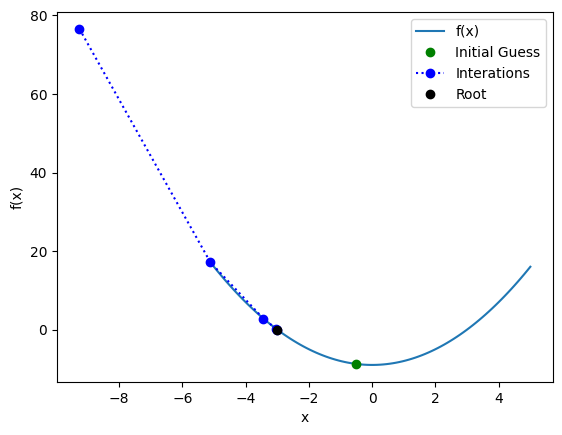

In [7]:
# Plot the function and the root
x = np.linspace(-5, 5, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x_0, f(x_0), 'go', label='Initial Guess')

plt.plot(X[1:-1], f(X[1:-1]), 'bo:', label='Interations')
plt.plot(root, f(root), 'ko', label='Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

7. Plotting  $ x_i $ as a function of itertations (i).

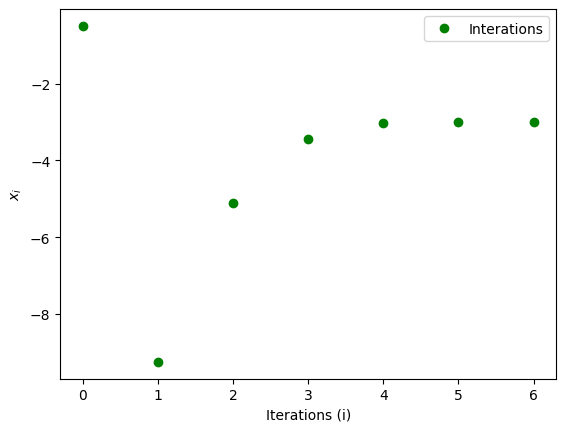

In [8]:
# Plot the function and the root
plt.plot(X, 'go', label='Interations')
plt.xlabel('Iterations (i)')
plt.ylabel(r'$x_i$')
plt.legend()
plt.show()

8. Showing the converge of $x$ by plotting $|x_{i+1}-x_{i}|$ as a function of itertations (i).

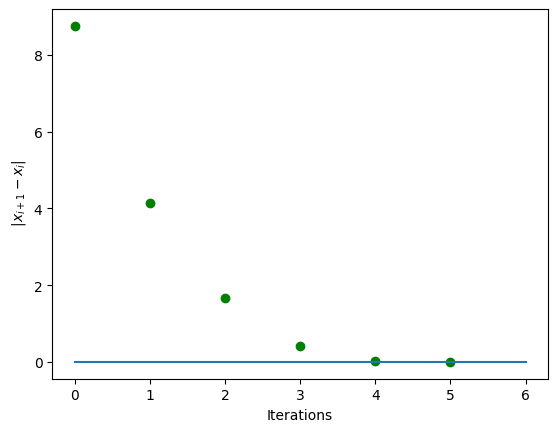

In [9]:
# Plot the function and the root
x = np.linspace(-5, 5, 100)
y = f(x)
plt.plot(np.abs(np.diff(X)), 'go', label='Interations')
plt.plot([0,I],[tol,tol],label='Tolerence')

plt.ylabel(r' $|x_{i+1}-x_{i}|$')
plt.xlabel('Iterations')

plt.show()